In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
fr = pd.DataFrame()

flights_to_add = ['N139LB', 'N166LB', 'N211LB', 'N221LB', 'N225LB', 'N226LB', 'N235LB', 'N238LB', 'N252LB',\
                  'N271LB', 'N329LB', 'N789LB']

min_pts_list = ['1416']

for loon in flights_to_add:
    
    for mp in min_pts_list:

        aux = pd.read_csv('../../../../og_data/DBSCAN/' + 'eps2.5/' +  loon \
                          + '/CL-' + loon 
                          + '-mp_'+ str(mp) +  '.csv', \
                          parse_dates=['ts'], low_memory=False)

        aux['eps'] = 0.00039
        aux['min_pts'] = mp


        fr = fr.append(aux)
    
bl = fr

In [4]:
bl['stationary'] = bl['cluster'].apply(lambda x: True if x != -1 else False)
bl

,ts,aircraft_id,alt,speed,Direction,registration_id,lat,lon,cluster,eps,min_pts,stationary
0,2020-05-19 07:27:42+00:00,HBAL130,56100,17,128,N139LB,-10.661179,26.802853,-1,0.00039,1416,False
1,2020-05-19 07:28:44+00:00,HBAL130,56100,17,128,N139LB,-10.664337,26.807114,-1,0.00039,1416,False
2,2020-05-19 07:29:47+00:00,HBAL130,56200,17,128,N139LB,-10.667585,26.811316,-1,0.00039,1416,False
3,2020-05-19 07:30:50+00:00,HBAL130,56200,18,126,N139LB,-10.670792,26.815590,-1,0.00039,1416,False
4,2020-05-19 07:31:52+00:00,HBAL130,56100,18,126,N139LB,-10.674102,26.819891,-1,0.00039,1416,False
...,...,...,...,...,...,...,...,...,...,...,...,...
198609,2019-01-07 16:47:53+00:00,HBAL523,53600,1,315,N789LB,0.853088,-73.148972,-1,0.00039,1416,False
198610,2019-01-07 16:49:40+00:00,HBAL523,53700,2,225,N789LB,0.852676,-73.149536,-1,0.00039,1416,False
198611,2019-01-07 16:49:59+00:00,HBAL523,53700,2,225,N789LB,0.852465,-73.149719,-1,0.00039,1416,False
198612,2019-01-07 18:01:06+00:00,HBAL523,53500,9,161,N789LB,0.735901,-73.122437,-1,0.00039,1416,False


In [5]:
# Let's check the altitudes when moving vs when staying

bl_median_alt = bl.groupby(['registration_id', 'stationary']).median().reset_index()

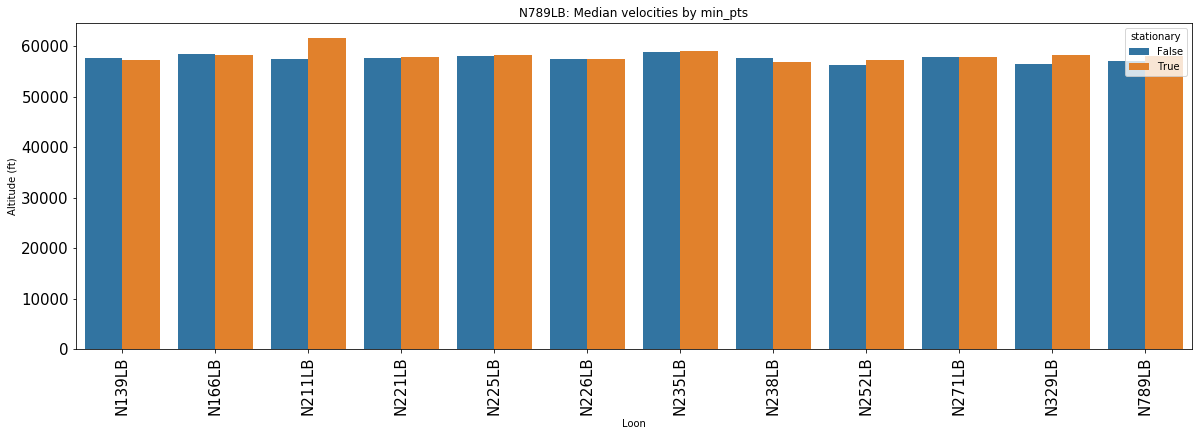

In [6]:
bl_median_alt = bl.groupby(['registration_id', 'stationary']).median().reset_index()

plt.figure(loon, figsize=(20,6))

ax = sns.barplot(x=bl_median_alt['registration_id'], y="alt", hue='stationary', \
                    data=bl_median_alt)

#ax.set(ylim=(0, 50))
dummy = ax.set_ylabel('Altitude (ft)')
dummy = ax.set_xlabel('Loon')
dummy = ax.set_title(loon + ': Median velocities by min_pts')
dummy = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
dummy = ax.tick_params(labelsize=15)

In [7]:
# Altitude does not seem to vary on stationarity

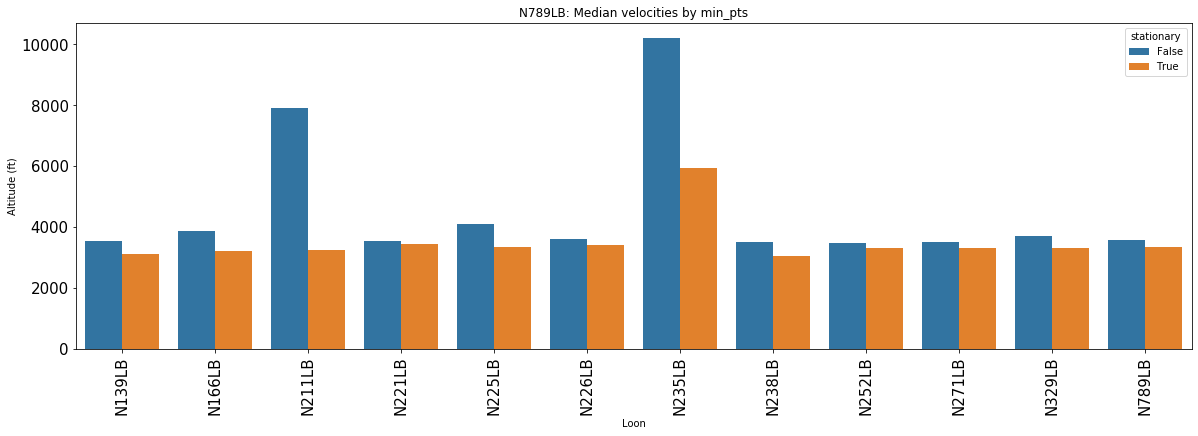

In [8]:
# How about change in altitude?

bl_median_alt = bl.groupby(['registration_id', 'stationary']).std().reset_index()

plt.figure(loon, figsize=(20,6))

ax = sns.barplot(x=bl_median_alt['registration_id'], y="alt", hue='stationary', \
                    data=bl_median_alt)

#ax.set(ylim=(0, 50))
dummy = ax.set_ylabel('Altitude (ft)')
dummy = ax.set_xlabel('Loon')
dummy = ax.set_title(loon + ': Median velocities by min_pts')
dummy = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
dummy = ax.tick_params(labelsize=15)

In [ ]:
# Also nothing